In [5]:
import pandas as pd
import re

# Load CSV (Ensure correct column names)
file_path = "news_sample.txt"
textpd = pd.read_csv(file_path, encoding="utf-8")

# Define the clean_text function
def clean_text(data):
    if not isinstance(data, str):
        return data  # Return unchanged if not a string

    # Convert text to lowercase
    data = data.lower()

    # Remove extra whitespace
    data = re.sub(r'\s+', " ", data)

    # Replace dates
    data = re.sub(r'\d{1,2}[./-]\d{1,2}[./-]\d{2,4}', "<DATE>", data)
    data = re.sub(r'(?:jan|feb|mar|apr|may|jun|jul|aug|sep|oct|nov|dec).? \d{1,2},? \d{4}', "<DATE>", data)
    data = re.sub(r'\d{4}-\d{2}-\d{2}', "<DATE>", data)

    # Replace emails
    data = re.sub(r'[\w._%+-]+@[\w.-]+\.[a-zA-Z]{2,}', "<EMAIL>", data)

    # Replace URLs
    data = re.sub(r'http[s]?://[^\s]+', "<URL>", data)

    # Replace numbers
    data = re.sub(r'\d+(\.\d+)?', "<NUM>", data)

    return data

# Apply cleaning to a specific text column
textpd["content"] = textpd["content"].astype(str).apply(clean_text)
textpd["title"] = textpd["title"].astype(str).apply(clean_text)
textpd["authors"] = textpd["authors"].astype(str).apply(clean_text)
textpd["tags"] = textpd["tags"].astype(str).apply(clean_text)
textpd["summary"] = textpd["summary"].astype(str).apply(clean_text)
textpd["meta_description"] = textpd["meta_description"].astype(str).apply(clean_text)
textpd["keywords"] = textpd["keywords"].astype(str).apply(clean_text)
textpd["meta_keywords"] = textpd["meta_keywords"].astype(str).apply(clean_text)

print (textpd)

# Combine all text into a single string
full_text = " ".join(textpd).lower()



     Unnamed: 0     id                domain        type  \
0             0    141               awm.com  unreliable   
1             1    256     beforeitsnews.com        fake   
2             2    700           cnnnext.com  unreliable   
3             3    768               awm.com  unreliable   
4             4    791  bipartisanreport.com   clickbait   
..          ...    ...                   ...         ...   
245         245  39259     beforeitsnews.com        fake   
246         246  39468     beforeitsnews.com        fake   
247         247  39477       www.newsmax.com         NaN   
248         248  39550       www.newsmax.com         NaN   
249         249  39558       www.newsmax.com         NaN   

                                                   url  \
0    http://awm.com/church-congregation-brings-gift...   
1    http://beforeitsnews.com/awakening-start-here/...   
2    http://www.cnnnext.com/video/18526/never-hike-...   
3    http://awm.com/elusive-alien-of-the-sea-ca

Added encoding="utf-8"
for: (with open(file_path, "r", encoding="utf-8") as file:)
as erros uccured with-out whihc made it unable to run.

Unique words after cleaning: 16769

50 Most common words after cleaning with clean-text module:
the: 9760
of: 5119
to: 5048
and: 4854
a: 3516
in: 3215
num: 2671
is: 2410
that: 2326
s: 1862
it: 1664
for: 1644
you: 1267
are: 1249
on: 1233
with: 1185
this: 1169
as: 1114
i: 1046
nan: 1011
02: 1008
be: 956
by: 870
have: 803
was: 795
01: 792
2018: 791
not: 752
from: 739
at: 725
or: 710
we: 701
they: 649
but: 601
com: 597
your: 571
has: 563
all: 531
an: 528
their: 515
19: 502
41: 502
will: 498
can: 491
more: 488
about: 477
what: 477
one: 465
if: 460
he: 458


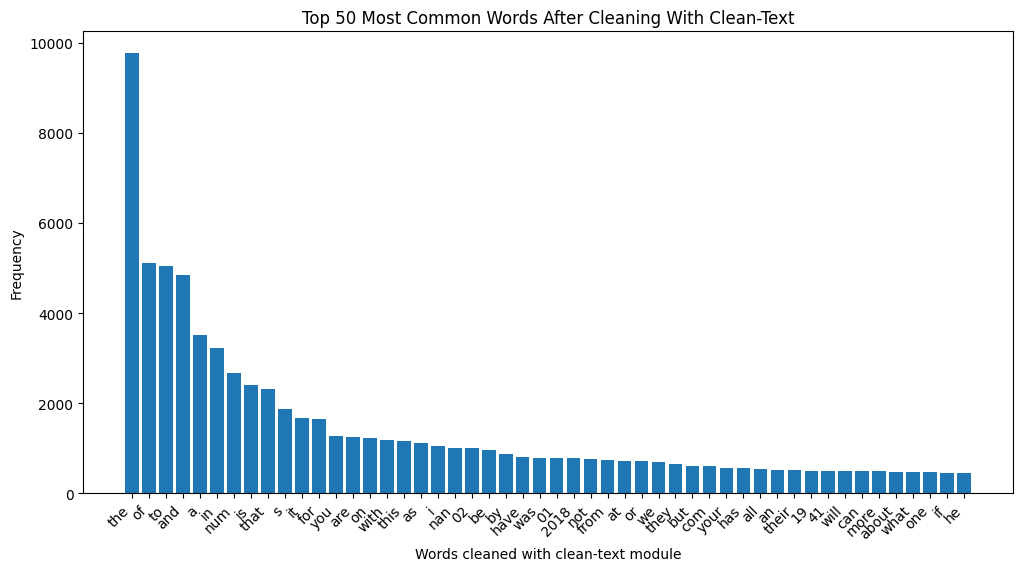

In [6]:
"""Part 3"""

from collections import Counter
import matplotlib.pyplot as plt

#Calculate number of unique words

"""For Panda text"""
test_clean_textpd = re.findall(r'\w+', textpd.to_string().lower()) 
word_counts4 = Counter(test_clean_textpd)
unique_words4 = len(word_counts4)
print("Unique words after cleaning:", unique_words4)


#Calculate top 50 frequency words

"""For clean-text module"""
top_50_clean_textpd = word_counts4.most_common(50)
print("\n50 Most common words after cleaning with clean-text module:")
for word, count in top_50_clean_textpd:
    print(f"{word}: {count}") 

# Separate the words and their counts for plotting
labels4, frequencies4 = zip(*top_50_clean_textpd)

# Plot top 50 words used 
plt.figure(figsize=(12, 6))
plt.bar(labels4, frequencies4)
plt.xticks(rotation=45, ha='right')
plt.xlabel('Words cleaned with clean-text module')
plt.ylabel('Frequency')
plt.title('Top 50 Most Common Words After Cleaning With Clean-Text')
plt.show()

For better comparison has frequency analysis been done for both my own cleaning function and the clean-text module function. The results from these functions are very similar. 